In [ ]:
#yfinance: This library is used to download historical stock data from Yahoo Finance.
#numpy: Provides support for large, multi-dimensional arrays and matrices, which is commonly used in numerical operations.
#pandas: A powerful library for data manipulation and analysis, particularly useful for handling time series data.
#MinMaxScaler: Part of scikit-learn, it scales data to a specified range (0 to 1 in this case), which is important for neural network training.
#Sequential, LSTM, Dense: Components of the Keras library, where Sequential is used to initialize the neural network, LSTM represents the LSTM layer, and Dense is used to add a fully connected layer to the neural network.

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
### Downloading Historical Stock Data:
data=pd.read_csv('/content/AAPL.csv')

In [ ]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


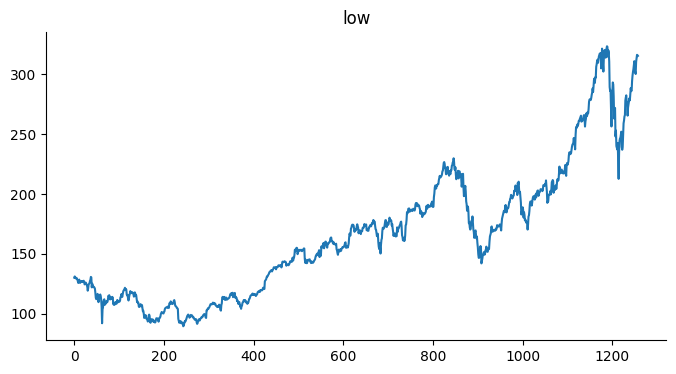

In [ ]:
# @title low

from matplotlib import pyplot as plt
data['low'].plot(kind='line', figsize=(8, 4), title='low')
plt.gca().spines[['top', 'right']].set_visible(False)

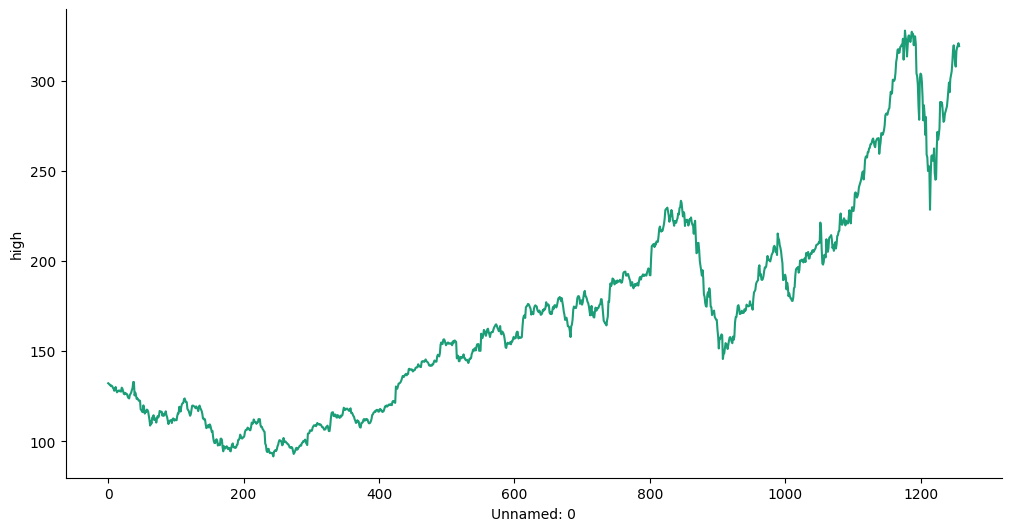

In [ ]:
# @title Unnamed: 0 vs high

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['high']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('high')

In [ ]:
#close_prices: Extracts the closing prices from the downloaded data and reshapes them.
#scaler: Initializes a MinMaxScaler, which scales data between 0 and 1.
#close_prices_scaled: Applies Min-Max scaling to normalize the closing prices.

close_prices = data['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

In [ ]:
close_prices_scaled

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
# Create input data for LSTM
# create input sequence for model

def create_lstm_data(data, time_steps=1):
 x, y = [], []  # array
 for i in range(len(data) - time_steps):
  x.append(data[i:(i + time_steps), 0])
  y.append(data[i + time_steps, 0])
 return np.array(x), np.array(y)

In [ ]:
time_steps = 10
x, y = create_lstm_data(close_prices_scaled, time_steps)   # x output, y input
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [ ]:
# Build the LSTM model
# model: Initializes a sequential neural network model.
#  neural network Sequential(),  LSTM (units=50), model compile Adam and loss= mean_squarred_error.
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50
39/39 [==============================] - 4s 11ms/step - loss: 0.0261
Epoch 2/50
39/39 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 3/50
39/39 [==============================] - 1s 14ms/step - loss: 8.6248e-04
Epoch 4/50
39/39 [==============================] - 1s 15ms/step - loss: 8.2032e-04
Epoch 5/50
39/39 [==============================] - 1s 22ms/step - loss: 8.0648e-04
Epoch 6/50
39/39 [==============================] - 1s 20ms/step - loss: 8.4857e-04
Epoch 7/50
39/39 [==============================] - 1s 22ms/step - loss: 7.7602e-04
Epoch 8/50
39/39 [==============================] - 1s 19ms/step - loss: 8.1120e-04
Epoch 9/50
39/39 [==============================] - 1s 17ms/step - loss: 7.7676e-04
Epoch 10/50
39/39 [==============================] - 1s 27ms/step - loss: 7.6573e-04
Epoch 11/50
39/39 [==============================] - 1s 16ms/step - loss: 7.7462e-04
Epoch 12/50
39/39 [==============================] - 1s 16ms/step - loss: 7.4731e-

In [ ]:
##  Predicting Future Stock Prices:
##  Use training models to make predictions for future stock prices.
##  The code predicts future stock prices based on the last available historical data, providing insights for potential market movements.

future_dates = pd.date_range(start = end_date, periods=30)
last_prices = close_prices[-time_steps:]
last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
predicted_prices_scaled = model.predict(x_pred)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

NameError: name 'end_date' is not defined

In [ ]:
future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices.flatten()})
print(future_data)

NameError: name 'future_dates' is not defined